In [ ]:
#practice with the iris dataset
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df=sns.load_dataset('iris')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


<Axes: xlabel='sepal_length', ylabel='sepal_width'>

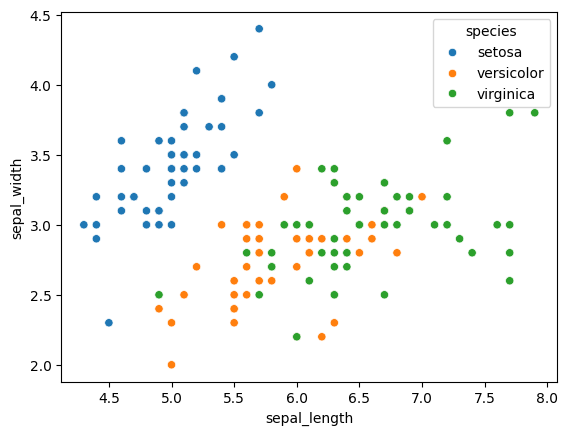

In [ ]:
# 1
#Using Pandas and Seaborn, create a scatter plot to visualize the relationship between sepal length and sepal width, color-coded by species.
#ans
sns.scatterplot(x='sepal_length',y='sepal_width',hue='species',data=df)

In [ ]:
#2 imp
#Using Pandas, calculate the mean, median, and standard deviation of sepal length for each species.
#ans
df['sepal_length'].groupby(df['species']).agg(['mean','median','std'])

,mean,median,std
species,,,
setosa,5.006,5.0,0.352490
versicolor,5.936,5.9,0.516171
virginica,6.588,6.5,0.635880


(array([ 9., 23., 14., 27., 16., 26., 18.,  6.,  5.,  6.]),
 array([4.3 , 4.66, 5.02, 5.38, 5.74, 6.1 , 6.46, 6.82, 7.18, 7.54, 7.9 ]),
 <BarContainer object of 10 artists>)

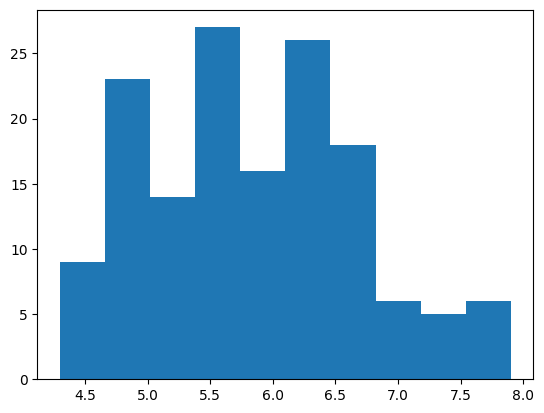

In [ ]:
#3
#Using NumPy and Matplotlib, create a histogram of sepal length for all species combined.
#ans
plt.hist(df['sepal_length'])

<Axes: xlabel='species', ylabel='petal_width'>

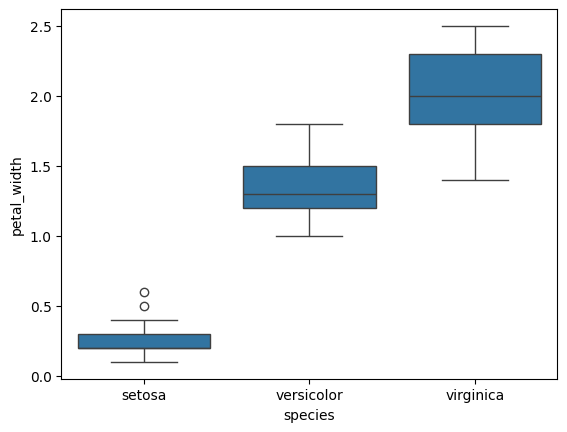

In [ ]:
#4
#Using Seaborn, create a box plot to compare the distribution of petal width across different species.
#ans
sns.boxplot(x='species',y='petal_width',data=df)

ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not 0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

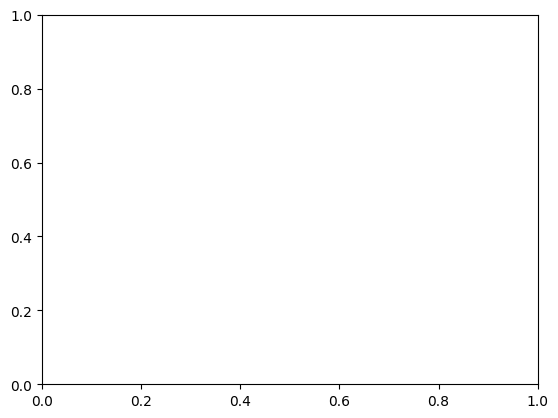

In [ ]:
#6
#Using NumPy and Matplotlib, create a scatter plot of sepal length vs. petal length, with different colors for each species.
#ans
plt.scatter('sepal_length','petal_length',data=df,c='species')

# EDA (EXPLORATORY DATA ANALYSIS)

# EDA with Python and applying Logistic Regression

For this lecture we will be working with the Titanic dataset from kaggle. This is a very famous data set and very often is a students first step in the machine learning!

We'll be trying to predict a classification. survival or dataset. let's begin our understand of implementing Logistic Regression in Python for classification.

We'll use a "semi cleaned" version of the titanic data set. if you use the data set hosted directly on kaggle. you may need to do some additional cleaning not shown in this lecture notebook.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Problem statement
 based on the titanic_train dataset we have to predict weather the passenger has survived or not

In [ ]:
# The data
# let's start reading in the titanic train csv file into pandas dataframe
train =pd.read_csv('titanic_train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Exploratory Data Analysis
Let's begin some exploratory data analysis! We'll start by checking out missing data!

# Missing Data
We can use seaborn to create a simple heatmap to see where we are missing data!

In [ ]:
train.isnull() #if it is true then that value is null

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<Axes: >

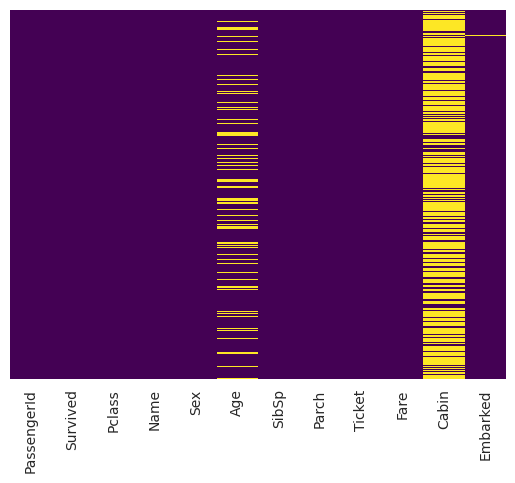

In [ ]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis') #here yticklabels=false means that the y axis values will be not shown (0-890)
#to disable the -1 to +1 bar in the right cbar=false is used and for styiling cmap= 'viridis' is used

Roughly 20 percent of the Age data is missing. The proportion of Age missing is likely small enough for reasonable replacement with some form of imputation. Looking at the Cabin column, it looks like we are just missing too much of that data to do something useful with at a basic level. We'll probably drop this later, or change it to another feature like "Cabin Known: 1 or 0"

Let's continue on by visualizing some more of the data! Check out the video for full explanations over these plots, this code is just to serve as reference.

<Axes: xlabel='Survived', ylabel='count'>

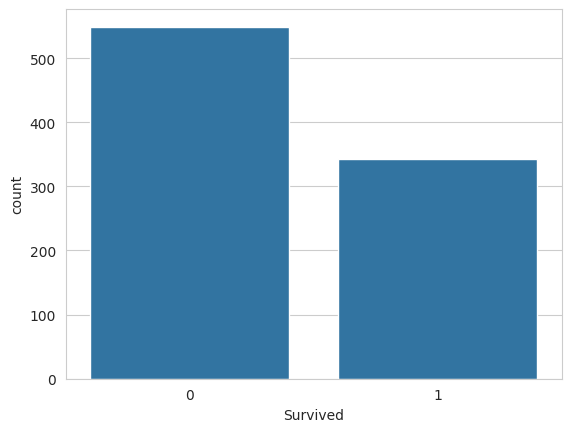

In [ ]:

sns.set_style('whitegrid') # set_style is used for setting the style of the graph like grids
sns.countplot(x='Survived',data=train)
# here we are trying to find out how many people survived

<Axes: xlabel='Survived', ylabel='count'>

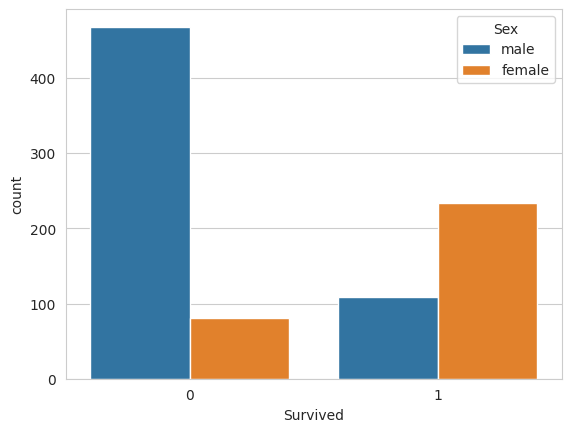

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x="Survived",hue='Sex',data=train)
# here we find out that how many males and females got survived here 0 means not survived and 1 means survived this means that females survived more than males

<Axes: xlabel='Survived', ylabel='count'>

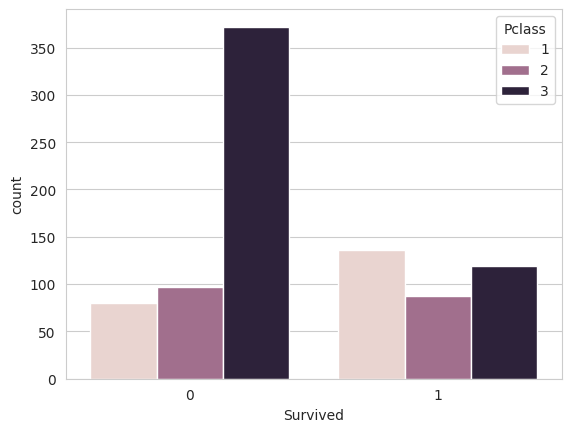

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train)
# here passenger class and survived realtionship is studied in detailed
#pclass 1 means rich and 2 means middle class 3 means poor

<ipython-input-112-f8c145b9a849>:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='Age'>

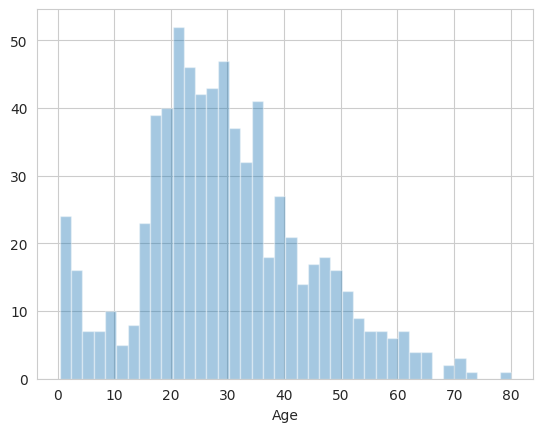

In [ ]:
sns.distplot(train['Age'].dropna(),kde=False,bins=40)
#since there were many null values in the age above seen in heatmap now we have dropped them by dropna() function and set the bin size to 40 means 40 bars will be plotted

(array([30., 14., 10., 14.,  3., 29., 39., 65., 73., 42., 65., 62., 33.,
        47., 38., 21., 28., 21., 16., 14., 15.,  7.,  9.,  8.,  4.,  0.,
         5.,  1.,  0.,  1.]),
 array([ 0.42      ,  3.07266667,  5.72533333,  8.378     , 11.03066667,
        13.68333333, 16.336     , 18.98866667, 21.64133333, 24.294     ,
        26.94666667, 29.59933333, 32.252     , 34.90466667, 37.55733333,
        40.21      , 42.86266667, 45.51533333, 48.168     , 50.82066667,
        53.47333333, 56.126     , 58.77866667, 61.43133333, 64.084     ,
        66.73666667, 69.38933333, 72.042     , 74.69466667, 77.34733333,
        80.        ]),
 <BarContainer object of 30 artists>)

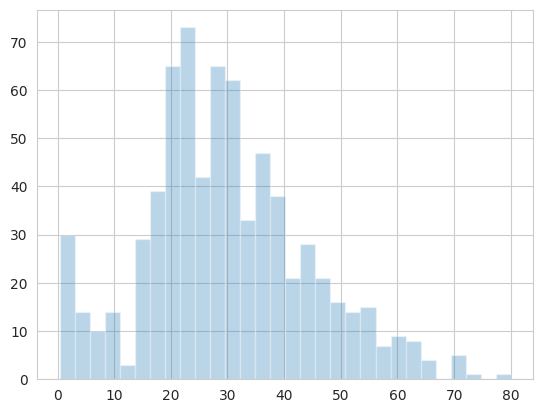

In [ ]:
# or we can visualize this by matplotlib
plt.hist(train['Age'],bins=30,alpha=0.3) #here alpha is for transperancy appearance of bars

<Axes: xlabel='SibSp', ylabel='count'>

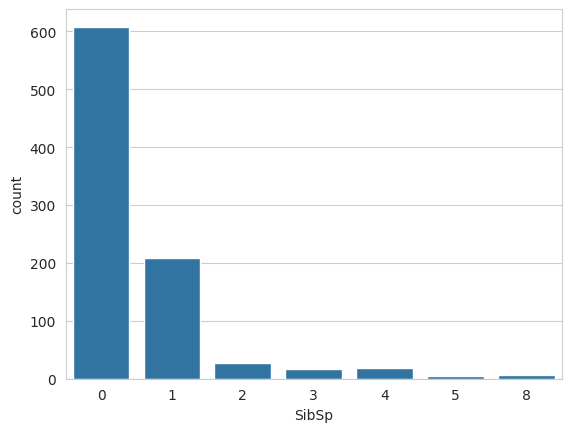

In [ ]:
sns.countplot(x='SibSp',data=train)
#here we can see that maximum people did not have any siblings or spouse

<ipython-input-115-16c5f71e995d>:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='Fare'>

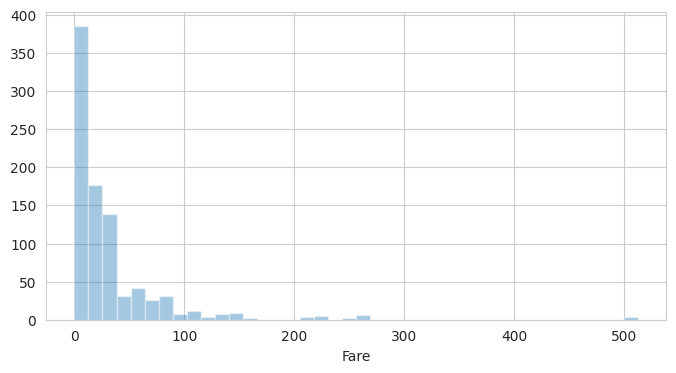

In [ ]:
plt.figure(figsize=(8,4)) #this is for setting the size of grid
sns.distplot(train['Fare'],kde=False,bins=40)
# what is the average fair of the people who bought tickets

# Data Cleaning
We want to fill in missing age data instead of just dropping the missing age data rows. One way to do this is by filling in the mean age of all the passengers (imputation). However we can be smarter about this and check the average age by passenger class. For example:

<ipython-input-116-ee721180aba4>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




<Axes: xlabel='Pclass', ylabel='Age'>

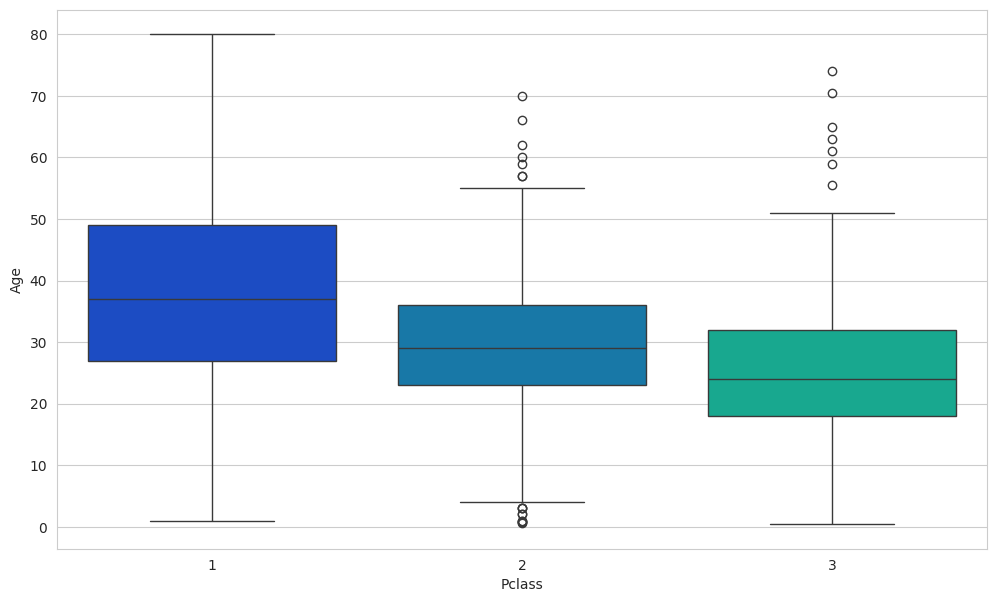

In [ ]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')
# here it says that the average age for pclass 1 is 38 for class 2 is 29 and class 3 is 24

In [ ]:
#function for replacing the missing values
def impute_age(cols): #here the cols will be train[['age','pclass']]
  Age=cols[0]
  PClass=cols[1]
  if pd.isnull(Age):
    if PClass==1:
      return 37
    elif PClass==2:
      return 29
    else:
      return 24
  else:
    return Age


In [ ]:
train["Age"]=train[["Age","Pclass"]].apply(impute_age,axis=1) # here the apply function will apply the function in dataframe of pandas impute age to the age column of the dataset
#here axis 1 means that the function is applied to row wise of the selected columns

<ipython-input-161-7d1ac196701a>:3: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

<ipython-input-161-7d1ac196701a>:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



<Axes: >

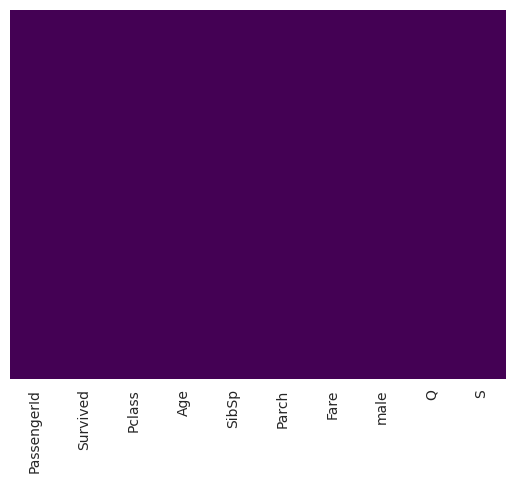

In [ ]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis') #here yticklabels=false means that the y axis values will be not shown (0-890)
#now the null values in the age are been replaced by the average age of their respective calsses

In [ ]:
# now since there are so many null values in the cabin column we'll drop the column
train.drop('Cabin',axis=1,inplace=True) #here axis 1 means do operation rowwise and inplace true means do in the original dataset and not in copy
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [ ]:
train.dropna(inplace=True)

# Converting Categorical Features
We'll need to convert categorical features to dummy variables using pandas! Otherwise our machine learning algorithm won't be able to directly take in those features as inputs.

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [ ]:
pd.get_dummies(train["Embarked"],drop_first=True).head()
#drop_first=True: This is an important argument. It ensures that one of the generated dummy columns is dropped to avoid multicollinearity (a problem for some machine learning algorithms).
#In simpler terms, if 'Embarked' has 3 unique values ('C', 'Q', 'S'), it creates 3 new columns but drops the first one('C'), leaving only two dummy columns ('Q' and 'S'). This is often used to improve model performance.

,Q,S
0,False,True
1,False,False
2,False,True
3,False,True
4,False,True


In [ ]:
#here below we have converted sex and embarked column into dummy variables with pandas get_dummies function
sex = pd.get_dummies(train['Sex'],drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)
#here below we have dropped all the columns which are not necessary for finding the desired output
train.drop(['Sex','Embarked','Name','Ticket'],inplace=True,axis=1)
#now we have to append this train sex embark coulmns since they are the categorical features
train = pd.concat([train,sex,embark],axis=1)
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,True,False,True
1,2,1,1,38.0,1,0,71.2833,False,False,False
2,3,1,3,26.0,0,0,7.9250,False,False,True
3,4,1,1,35.0,1,0,53.1000,False,False,True
4,5,0,3,35.0,0,0,8.0500,True,False,True


# Building a Logistic Regression model
Let's start by splitting our data into a training set and test set (there is another test.csv file that you can play around with in case you want to use all this data for training).

Logistic Regression is a statistical method used for binary classification problems, where the outcome is either 0 or 1 (e.g., survived or not survived). Here's how to build a Logistic Regression model:

1. Import the necessary libraries
2. Prepare your data:
Separate your features (independent variables) and target variable (dependent variable).
3. Split data into training and testing sets:
4. Create and train the model:
5. Make predictions:
6. Evaluate the model

# Train Test Split

In [ ]:
#now survived is dependent features whereas all other are independent featuers

In [ ]:
#step 2
train.drop('Survived',axis=1) # the train data

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,3,22.0,1,0,7.2500,True,False,True
1,2,1,38.0,1,0,71.2833,False,False,False
2,3,3,26.0,0,0,7.9250,False,False,True
3,4,1,35.0,1,0,53.1000,False,False,True
4,5,3,35.0,0,0,8.0500,True,False,True
...,...,...,...,...,...,...,...,...,...
886,887,2,27.0,0,0,13.0000,True,False,True
887,888,1,19.0,0,0,30.0000,False,False,True
888,889,3,24.0,1,2,23.4500,False,False,True
889,890,1,26.0,0,0,30.0000,True,False,False


In [ ]:
train['Survived'].head() # the output data

,Survived
0,0
1,1
2,1
3,1
4,0


In [ ]:
#step 1
from sklearn.model_selection import train_test_split

In [ ]:
#step 3
x_train,x_test,y_train,y_test=train_test_split(train.drop('Survived',axis=1),train['Survived'],test_size=0.30,random_state=101)
"""
train_test_split: This is a function from the sklearn.model_selection module. Its purpose is to randomly split a dataset into training and testing subsets.
train.drop('Survived',axis=1): This part provides the features (independent variables) for the model.
train['Survived']: This part provides the target variable (dependent variable), which is the 'Survived' column. This is what the model will be trained to predict.
test_size=0.30: This argument specifies that 30% of the data should be allocated to the test set, while the remaining 70% will be used for training.
random_state=101: This ensures that the data is split in the same way every time the code is run. This is important for reproducibility, making sure that you get the same results if you run the code again.

x_train, x_test, y_train, y_test = ...: This part assigns the results of the split to four variables:
x_train: Features for training the model.
x_test: Features for testing the model.
y_train: Target variable for training the model.
y_test: Target variable for testing the model.
"""


"\ntrain_test_split: This is a function from the sklearn.model_selection module. Its purpose is to randomly split a dataset into training and testing subsets.\ntrain.drop('Survived',axis=1): This part provides the features (independent variables) for the model.\ntrain['Survived']: This part provides the target variable (dependent variable), which is the 'Survived' column. This is what the model will be trained to predict.\ntest_size=0.30: This argument specifies that 30% of the data should be allocated to the test set, while the remaining 70% will be used for training.\nrandom_state=101: This ensures that the data is split in the same way every time the code is run. This is important for reproducibility, making sure that you get the same results if you run the code again.\n\nx_train, x_test, y_train, y_test = ...: This part assigns the results of the split to four variables:\nx_train: Features for training the model.\nx_test: Features for testing the model.\ny_train: Target variable fo

# Training and Predicting

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logmodel = LogisticRegression() #it is the logistic regression algorithm
logmodel.fit(x_train,y_train)
"""
fit(): This is a method of the LogisticRegression class. It's the step where the actual training happens. You "fit" the model to your training data.
x_train: This is the training data containing the features (independent variables) used to predict the outcome. In this scenario, it likely includes features like passenger class, age, sex, etc. This data is used by the LogisticRegression() object to learn to differentiate between the samples that survived vs. the samples that did not survive.
y_train: This is the training data containing the target variable (dependent variable), which is what you're trying to predict – in this case, whether the passenger survived (1) or not (0). The relationship between the data in x_train and y_train is what the model learns.
"""

LogisticRegression()

In [ ]:
predictions = logmodel.predict(x_test) #This line uses the trained logmodel to predict the survival outcomes (0 or 1) for the data in x_test. Remember, x_test contains a portion of the Titanic dataset that was set aside for testing the model's accuracy. The results of these predictions are stored in the predictions variable.
from sklearn.metrics import confusion_matrix # confusion matrix is a tool for evaluating the performance of classification models.
accuracy=confusion_matrix(y_test,predictions) #here the y_test is the actual outcomes from the test while predictions is outcome by model
accuracy

array([[134,  20],
       [ 37,  77]])

In [ ]:
from sklearn.metrics import accuracy_score #accuracy_score  It is designed to calculate the accuracy of a classification model.
accuracy=accuracy_score(y_test,predictions) # here y_test holds the true label of data points while the predictions holds the label generated by machine learning model by training test
accuracy

0.7873134328358209

# Evaluation
We can check precision,recall,f1-score using classification report!

In [ ]:
from sklearn.metrics import classification_report #The classification_report function is designed to generate a text report showing the main classification metrics—precision, recall, F1-score, and support—for each class in your classification problem.
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.78      0.87      0.82       154
           1       0.79      0.68      0.73       114

    accuracy                           0.79       268
   macro avg       0.79      0.77      0.78       268
weighted avg       0.79      0.79      0.78       268

